In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import onnxruntime as ort
from pathlib import Path
import supervision as sv
from ultralytics import YOLO
from time import sleep

In [3]:
path_models = Path('../optimization_tests/models/')

In [4]:
model_defect_od_onnx_fixed = ort.InferenceSession(
    path_models / 'model_defect_od_crop.onnx', 
    providers=['CPUExecutionProvider']
)
model_terminal_od_onnx_fixed = ort.InferenceSession(
    path_models / 'model_terminal_od.onnx', 
    providers=['CPUExecutionProvider']
)

In [5]:
model_terminal_od = YOLO(path_models/'model_terminal_od.pt')
model_terminal_defect_od = YOLO(path_models/'model_defect_od_crop.pt')

In [6]:
box_annotator = sv.BoxAnnotator(
    thickness=2,
    text_thickness=2,
    text_scale=1
)

In [7]:
cap = cv2.VideoCapture(0)
# cap.set(3, 720)
# cap.set(4, 720)
while True:
    ret, frame = cap.read()
    # result = model_terminal_od(frame)[0]
    # detections = sv.Detections.from_ultralytics(result)
    # frame = box_annotator.annotate(scene=frame, detections=detections)
    cv2.imshow('temp', frame)
    # cap.release()

    # if (cv2.waitKey(30)==27):
    #     break

In [5]:
def calc_coords(filtered_rows, x_factor, y_factor):
    left = ((filtered_rows[:, 0] - filtered_rows[:, 2] / 2) * x_factor)
    top = ((filtered_rows[:, 1] - filtered_rows[:, 3] / 2) * y_factor)
    width = (filtered_rows[:, 2] * x_factor)
    height = (filtered_rows[:, 3] * y_factor)
    return left, top, width, height


def get_np_image(img):
    image_data = img / 255.0
    image_data = np.transpose(image_data, (2, 0, 1))  # Channel first
    image_data = np.expand_dims(image_data, axis=0).astype(np.float32)
    return image_data

def get_yolo_boxes(image_data, img_height, img_width, size, model, thr_conf=0.5, thr_iou=0.7):
    output = model.run(["output0"], {"images": image_data})[0][0].transpose()
    x_factor = img_width / size
    y_factor = img_height / size
    filtered_rows = output[output[:, 4:].max(axis=1) > thr_conf]
    filtered_rows = filtered_rows[filtered_rows[:, 4].argsort()]
    left, top, width, height = calc_coords(filtered_rows, x_factor, y_factor)
    boxes = np.array([left, top, width, height]).astype(int).T
    scores = filtered_rows[:, 4:].max(axis=1)
    indices = cv2.dnn.NMSBoxes(boxes, scores, thr_conf, thr_iou)
    boxes = boxes[indices]
    return boxes

In [6]:
# cap = cv2.VideoCapture(0)
# cap.set(3, 720)
# cap.set(4, 720)
# # while True:
# ret, frame = cap.read()
# cv2.imshow('temp',frame)
# cap.release()

# # if (cv2.waitKey(30)==27):
# #     break

In [8]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    img_height, img_width = frame.shape[:2]
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_data = get_np_image(cv2.resize(img, (640, 640)))
    terminal_boxes = get_yolo_boxes(image_data, img_height, img_width, 640, model_terminal_od_onnx_fixed)
    # if not terminal_boxes.shape[0]:
    #     cv2.imshow('temp', img)
    #     continue
    bgr = (0, 255, 0)
    x1, y1, w, h = terminal_boxes[0]
    x2, y2 = x1 + w, y1 + h
    # cv2.rectangle(img, (x1, y1), (x2, y2), bgr, 2)
    cv2.imshow('temp',img)
    sleep(1)
    # x1, y1, w, h = terminal_boxes[0]
    # x2, y2 = x1 + w, y1 + h
    # tmp = cv2.rectangle(img, (x1, y1), (x2, y2), color=(255,0,0), thickness=2)
    # cv2.imshow('temp', tmp)

IndexError: index 0 is out of bounds for axis 0 with size 0

: 

In [1]:
from matplotlib.patches import Rectangle
plt.imshow(img)
plt.gca().add_patch(
    Rectangle(
        (terminal_boxes[0][0], terminal_boxes[0][1]), terminal_boxes[0][2], terminal_boxes[0][3],
        edgecolor='red', facecolor='none'
    )
)
plt.show()

NameError: name 'plt' is not defined

In [41]:
cv2.imshow('temp',tmp)

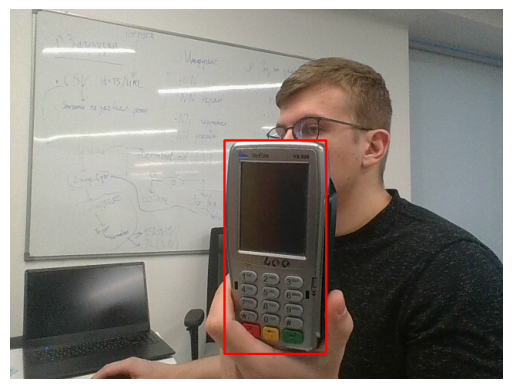

In [40]:

plt.imshow(tmp)
plt.axis('off')
plt.show()

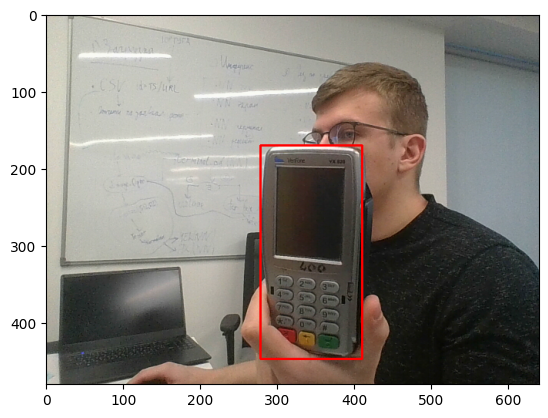

In [25]:
box_annotator = sv.BoxAnnotator(
    thickness=2, text_thickness=2,
    text_scale=1
)

In [26]:
frame = box_annotator.annotate(scene=frame, detections=terminal_boxes)

AttributeError: 'numpy.ndarray' object has no attribute 'xyxy'

In [9]:
terminal_boxes

array([[278, 170, 132, 277]])